# 1. Model Building

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [14]:
!pip install imbalanced-learn

In [15]:
!pip install spacy


In [16]:
!pip install imblearn

In [17]:
!pip install SMOTE

In [18]:
# getting the additional sampling data
#from imblearn.over_sampling import SMOTE

# Model Validation
#from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
data=pd.read_csv("Updated_E_Book_Data.csv")
data

,sentences,cleaned_text,sentiment_value,word_count,category,cleaned_text_1,polarity
0,an autobiography,autobiographi,0,2,Neutral,['autobiographi'],0.000000
1,avul pakir jainulabdeen abdul kalam has,avul pakir jainulabdeen abdul kalam,0,6,Neutral,"['avul', 'pakir', 'jainulabdeen', 'abdul', 'ka...",0.000000
2,come to personally represent to many of his co...,come person repres mani countrymen,0,10,Neutral,"['come', 'person', 'repre', 'mani', 'countryman']",0.000000
3,best aspects of indian life born in 1931 the s...,best aspect indian life born son littl,3,13,Positive,"['good', 'aspect', 'indian', 'life', 'bear', '...",1.000000
4,educated boatowner in rameswaram tamilnadu he had,educ boatown rameswaram tamilnadu,0,7,Neutral,"['educ', 'boatown', 'rameswaram', 'tamilnadu']",0.000000
...,...,...,...,...,...,...,...
6429,system the technology vision – 2020 plan will ...,system technolog vision plan put,1,10,Positive,"['system', 'technolog', 'vision', 'plan']",0.000000
6430,place certain schemes and plans for the econom...,place certain scheme plan econom growth,3,9,Positive,"['place', 'certain', 'scheme', 'plan', 'econom...",0.214286
6431,and prosperity of the nation these two plans h...,prosper nation two plan evolv,0,10,Neutral,"['prosper', 'nation', 'plan', 'evolv']",0.000000
6432,out of the nation’s dreams i,nation dream,1,6,Positive,"['nation', 'dream']",0.000000


In [24]:
data1=data[['cleaned_text','category']]
data1

,cleaned_text,category
0,autobiographi,Neutral
1,avul pakir jainulabdeen abdul kalam,Neutral
2,come person repres mani countrymen,Neutral
3,best aspect indian life born son littl,Positive
4,educ boatown rameswaram tamilnadu,Neutral
...,...,...
6429,system technolog vision plan put,Positive
6430,place certain scheme plan econom growth,Positive
6431,prosper nation two plan evolv,Neutral
6432,nation dream,Positive


In [25]:
data1['category'].value_counts()

Neutral     4164
Positive    1557
Negative     713
Name: category, dtype: int64

In [26]:
data1=data1.drop(data1.index[data1['category'] == 'Neutral'])
data1

,cleaned_text,category
3,best aspect indian life born son littl,Positive
6,highest civilian award india bharat ratna,Positive
8,develop programm kalam demonstr great,Positive
9,potenti dynam innov exist,Positive
12,profession struggl well stori agni prithvi,Negative
...,...,...
6426,secur growth develop self relianc,Positive
6428,arm forc stateoftheart competit weapon,Positive
6429,system technolog vision plan put,Positive
6430,place certain scheme plan econom growth,Positive


In [27]:
data1=data1.reset_index()

In [28]:
data1

,index,cleaned_text,category
0,3,best aspect indian life born son littl,Positive
1,6,highest civilian award india bharat ratna,Positive
2,8,develop programm kalam demonstr great,Positive
3,9,potenti dynam innov exist,Positive
4,12,profession struggl well stori agni prithvi,Negative
...,...,...,...
2265,6426,secur growth develop self relianc,Positive
2266,6428,arm forc stateoftheart competit weapon,Positive
2267,6429,system technolog vision plan put,Positive
2268,6430,place certain scheme plan econom growth,Positive


In [29]:
data1=data1[['cleaned_text','category']]
data1

,cleaned_text,category
0,best aspect indian life born son littl,Positive
1,highest civilian award india bharat ratna,Positive
2,develop programm kalam demonstr great,Positive
3,potenti dynam innov exist,Positive
4,profession struggl well stori agni prithvi,Negative
...,...,...
2265,secur growth develop self relianc,Positive
2266,arm forc stateoftheart competit weapon,Positive
2267,system technolog vision plan put,Positive
2268,place certain scheme plan econom growth,Positive


In [30]:
def categorical_to_ratings(x):
    if x=='Positive':
        return 1
    else:
        return 0

In [31]:
data1['ratings']=data1['category'].apply(categorical_to_ratings)
data1

,cleaned_text,category,ratings
0,best aspect indian life born son littl,Positive,1
1,highest civilian award india bharat ratna,Positive,1
2,develop programm kalam demonstr great,Positive,1
3,potenti dynam innov exist,Positive,1
4,profession struggl well stori agni prithvi,Negative,0
...,...,...,...
2265,secur growth develop self relianc,Positive,1
2266,arm forc stateoftheart competit weapon,Positive,1
2267,system technolog vision plan put,Positive,1
2268,place certain scheme plan econom growth,Positive,1


Text(0, 0.5, 'Sentiment Value Count')

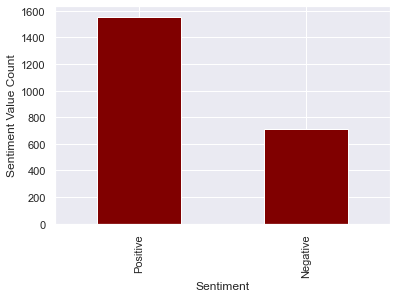

In [32]:
data1['category'].value_counts().plot.bar(color = 'maroon')

plt.xlabel('Sentiment')
plt.ylabel('Sentiment Value Count')

In [33]:
vectorizer = TfidfVectorizer()
array = vectorizer.fit_transform(data1['cleaned_text'].values.astype('U')).toarray()

In [34]:
text_df = pd.DataFrame(array,columns= vectorizer.get_feature_names())
text_df

,abandon,abdul,abil,abl,abod,abort,abou,abroad,absenc,absolut,...,year,yeat,yet,york,young,youth,zameela,zeal,zero,zohara
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
text_df['category'] =  data1['category']
text_df

,abandon,abdul,abil,abl,abod,abort,abou,abroad,absenc,absolut,...,yeat,yet,york,young,youth,zameela,zeal,zero,zohara,category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive


In [36]:
text_df.columns

Index(['abandon', 'abdul', 'abil', 'abl', 'abod', 'abort', 'abou', 'abroad',
       'absenc', 'absolut',
       ...
       'yeat', 'yet', 'york', 'young', 'youth', 'zameela', 'zeal', 'zero',
       'zohara', 'category'],
      dtype='object', length=2987)

In [37]:
text_df=text_df.drop_duplicates()
text_df

,abandon,abdul,abil,abl,abod,abort,abou,abroad,absenc,absolut,...,yeat,yet,york,young,youth,zameela,zeal,zero,zohara,category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive


In [38]:
text_df.shape

(2267, 2987)

In [39]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
text_df['category'] = encode.fit_transform(text_df['category'])

In [40]:
text_df

,abandon,abdul,abil,abl,abod,abort,abou,abroad,absenc,absolut,...,yeat,yet,york,young,youth,zameela,zeal,zero,zohara,category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# 2. Model Training | Train Test Split

In [41]:
X = text_df.drop(['category'],axis = 1)
y = text_df['category']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7, shuffle=True)

In [43]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
Accuracy=list()

In [44]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
#     y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    resample.append(sampling)
#     print(f'Accuracy of Model is = {accuracy_score(y_train,y_pred_train_bal)*100} %')
    print(f'Testing Accuracy of Model is = {accuracy_score(y_test,y_pred)} ')
    Accuracy.append(accuracy_score(y_test,y_pred))

# 3. Model Testing & Evaluation

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

# Model_1 Logistic Regression

### Logistic Regression: With Actual data

In [46]:
log_model=LogisticRegression()
params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

LogisticRegression(C=10.0)

In [47]:
test_eval(clf_LR,X_test, y_test, 'Logistic Regression', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.67      0.77       141
           1       0.87      0.97      0.92       313

    accuracy                           0.88       454
   macro avg       0.89      0.82      0.85       454
weighted avg       0.88      0.88      0.87       454
 

Testing Accuracy of Model is = 0.8788546255506607 


### Logistic Regression with SMOTE analysis

In [48]:
from imblearn.over_sampling import SMOTE


In [49]:
smote_balance = SMOTE(k_neighbors = 10, sampling_strategy='not majority',random_state= 7)
X_smote, y_smote = smote_balance.fit_resample(X,y)
print(y_smote.value_counts())
# y_bal.value_counts().plot.pie(autopct = '%0.2f%%')
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,test_size=0.2, random_state=7, shuffle=True)

1    1555
0    1555
Name: category, dtype: int64


In [50]:
log_reg_smote = LogisticRegression()
log_reg_model_smote = log_reg_smote.fit(X_train_smote,y_train_smote)

In [51]:
test_eval(log_reg_model_smote,X_test, y_test, 'Logistic Regression', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       141
           1       0.97      0.97      0.97       313

    accuracy                           0.96       454
   macro avg       0.96      0.96      0.96       454
weighted avg       0.96      0.96      0.96       454
 

Testing Accuracy of Model is = 0.9647577092511013 


### Logistic Regression with ADASYN analysis

In [52]:
from imblearn.over_sampling import ADASYN
ada_balance = ADASYN(sampling_strategy='not majority',random_state= 7)
X_ada, y_ada = ada_balance.fit_resample(X,y)
print(y_ada.value_counts())
X_train_ada,X_test_ada,y_train_ada,y_test_ada = train_test_split(X_ada,y_ada,test_size=0.2, random_state=7, shuffle=True)
# y_bal.value_counts().plot.pie(autopct = '%0.2f%%')

1    1555
0    1442
Name: category, dtype: int64


In [53]:
log_reg_ada = LogisticRegression()
log_reg_model_ada= log_reg_ada.fit(X_train_ada,y_train_ada)

In [54]:
test_eval(log_reg_model_ada,X_test, y_test, 'Logistic Regression', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       141
           1       0.97      0.96      0.97       313

    accuracy                           0.96       454
   macro avg       0.95      0.95      0.95       454
weighted avg       0.96      0.96      0.96       454
 

Testing Accuracy of Model is = 0.9559471365638766 


## Model-2 Decision Tree

### Actual data


In [55]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

In [56]:
tree_model = DecisionTreeClassifier()
tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}
DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
DT.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 11, 13, 15],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              50, 100]},
                   scoring='roc_auc', verbose=2)

In [57]:
test_eval(DT, X_test, y_test, 'Decision Tree', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.27      0.41       141
           1       0.75      0.98      0.85       313

    accuracy                           0.76       454
   macro avg       0.82      0.63      0.63       454
weighted avg       0.79      0.76      0.71       454
 

Testing Accuracy of Model is = 0.762114537444934 


### Decision Tree with SMOTE

In [58]:
DT_smote = DecisionTreeClassifier()
DT_smote_model = DT_smote.fit(X_train_smote,y_train_smote)
test_eval(DT_smote,X_test, y_test, 'Decision Tree', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       141
           1       0.94      0.96      0.95       313

    accuracy                           0.93       454
   macro avg       0.92      0.92      0.92       454
weighted avg       0.93      0.93      0.93       454
 

Testing Accuracy of Model is = 0.9317180616740088 


### Decision Tree with ADASYN

In [59]:
DT_ada = DecisionTreeClassifier()
DT_ada_model = DT_ada.fit(X_train_ada,y_train_ada)
test_eval(DT_ada,X_test, y_test, 'Decision Tree', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       141
           1       0.98      0.96      0.97       313

    accuracy                           0.96       454
   macro avg       0.95      0.96      0.95       454
weighted avg       0.96      0.96      0.96       454
 

Testing Accuracy of Model is = 0.9581497797356828 


# Model_3-Random forest

In [60]:
rf_model = RandomForestClassifier()
rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}
RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
RF.fit(X_train, y_train)
# clf_RF.best_estimator_
test_eval(RF, X_test, y_test, 'RandomForest', 'actual')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.69      1.00      0.82       313

    accuracy                           0.69       454
   macro avg       0.34      0.50      0.41       454
weighted avg       0.48      0.69      0.56       454
 

Testing Accuracy of Model is = 0.6894273127753304 


### Random Forest with SMOTE analysis


In [61]:
RF_smote = RandomForestClassifier()
RF_smote_model = RF_smote.fit(X_train_smote,y_train_smote)
test_eval(RF_smote,X_test, y_test, 'RandomForest', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       141
           1       0.94      0.99      0.97       313

    accuracy                           0.95       454
   macro avg       0.96      0.93      0.94       454
weighted avg       0.95      0.95      0.95       454
 

Testing Accuracy of Model is = 0.9515418502202643 


### Random Forest with ADASYN

In [62]:
RF_ada = RandomForestClassifier()
RF_ada_model = RF_ada.fit(X_train_ada,y_train_ada)
test_eval(RF_ada,X_test, y_test, 'RandomForest', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       141
           1       0.96      0.98      0.97       313

    accuracy                           0.96       454
   macro avg       0.96      0.94      0.95       454
weighted avg       0.96      0.96      0.96       454
 

Testing Accuracy of Model is = 0.9581497797356828 


# Model-4 Naive Bayes

In [63]:
nb = MultinomialNB()
nb_model = nb.fit(X_train,y_train)
test_eval(nb_model,X_test, y_test, 'Naive Bayes', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.32      0.48       141
           1       0.76      0.99      0.86       313

    accuracy                           0.78       454
   macro avg       0.86      0.66      0.67       454
weighted avg       0.82      0.78      0.74       454
 

Testing Accuracy of Model is = 0.7841409691629956 


### Naive Bayes with Smote

In [64]:
NB_smote = MultinomialNB()
NB_smote_model = NB_smote.fit(X_train_smote,y_train_smote)
test_eval(NB_smote,X_test, y_test, 'Naive Bayes', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       141
           1       0.98      0.96      0.97       313

    accuracy                           0.96       454
   macro avg       0.95      0.96      0.95       454
weighted avg       0.96      0.96      0.96       454
 

Testing Accuracy of Model is = 0.960352422907489 


### Naive Bayes :ADASYN


In [65]:
NB_ada = MultinomialNB()
NB_ada_model = NB_ada.fit(X_train_ada,y_train_ada)
test_eval(NB_ada,X_test, y_test, 'Naive Bayes', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       141
           1       0.98      0.96      0.97       313

    accuracy                           0.96       454
   macro avg       0.95      0.96      0.95       454
weighted avg       0.96      0.96      0.96       454
 

Testing Accuracy of Model is = 0.9581497797356828 


# Model-5 LinearSVC

### LinearSVC :actual

In [66]:
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc_model=svc.fit(X_train,y_train)
test_eval(svc_model,X_test, y_test, 'Linesr SVC', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       141
           1       0.89      0.96      0.92       313

    accuracy                           0.89       454
   macro avg       0.89      0.84      0.86       454
weighted avg       0.89      0.89      0.88       454
 

Testing Accuracy of Model is = 0.8876651982378855 


### Linear SVC :smote

In [67]:
SVC_smote = LinearSVC()
SVC_smote_model = SVC_smote.fit(X_train_smote,y_train_smote)
test_eval(SVC_smote_model,X_test, y_test, 'Linesr SVC', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       141
           1       0.98      0.98      0.98       313

    accuracy                           0.97       454
   macro avg       0.97      0.97      0.97       454
weighted avg       0.97      0.97      0.97       454
 

Testing Accuracy of Model is = 0.973568281938326 


### Linear SVC:adasyn


In [68]:
SVC_ada = LinearSVC()
SVC_ada_model = SVC_ada.fit(X_train_ada,y_train_ada)
test_eval(SVC_ada,X_test, y_test, 'Linesr SVC', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       141
           1       0.99      0.98      0.98       313

    accuracy                           0.98       454
   macro avg       0.97      0.98      0.97       454
weighted avg       0.98      0.98      0.98       454
 

Testing Accuracy of Model is = 0.9779735682819384 


# Model-06 AdaBoost

### Adaboost :actual

In [69]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=555)
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(base_estimator=dt, learning_rate=0.001, n_estimators=1000, random_state=222)
ada_model.fit(X_train ,y_train)
test_eval(ada_model,X_test, y_test, 'AdaBoostClassifier', 'actual')


Classification Report
              precision    recall  f1-score   support

           0       0.60      0.89      0.72       141
           1       0.94      0.73      0.82       313

    accuracy                           0.78       454
   macro avg       0.77      0.81      0.77       454
weighted avg       0.83      0.78      0.79       454
 

Testing Accuracy of Model is = 0.7797356828193832 


### Adaboost:smote

In [70]:
ada_smote = AdaBoostClassifier()
ada_smote_model = ada_smote.fit(X_train_smote,y_train_smote)
test_eval(ada_smote_model,X_test, y_test, 'AdaBoostClassifier', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.50      0.65       141
           1       0.81      0.98      0.89       313

    accuracy                           0.83       454
   macro avg       0.87      0.74      0.77       454
weighted avg       0.85      0.83      0.81       454
 

Testing Accuracy of Model is = 0.8303964757709251 


### Adaboost:adasyn


In [71]:
ada_ada = AdaBoostClassifier()
ada_ada_model = ada_ada.fit(X_train_ada,y_train_ada)
test_eval(ada_ada,X_test, y_test, 'AdaBoostClassifier', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.48      0.63       141
           1       0.81      0.97      0.88       313

    accuracy                           0.82       454
   macro avg       0.85      0.73      0.75       454
weighted avg       0.83      0.82      0.80       454
 

Testing Accuracy of Model is = 0.8215859030837004 


# Model_7 XgBoost

In [72]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### Xgboost :actual

In [73]:
from xgboost import XGBRegressor
import xgboost as xgb
from xgboost import XGBClassifier
xg_reg = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, num_class=11)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
test_eval(xg_reg,X_test, y_test, 'XGBClassifier', 'actual')

[20:50:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.04      0.08       141
           1       0.70      1.00      0.82       313

    accuracy                           0.70       454
   macro avg       0.85      0.52      0.45       454
weighted avg       0.79      0.70      0.59       454
 

Testing Accuracy of Model is = 0.7026431718061674 


### Xgboost:smote

In [74]:
xg_smote = XGBClassifier()
xg_smote_model = xg_smote.fit(X_train_smote,y_train_smote)
test_eval(xg_smote_model,X_test, y_test, 'XGBClassifier', 'smote')

[20:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.72      0.80       141
           1       0.88      0.97      0.93       313

    accuracy                           0.89       454
   macro avg       0.90      0.84      0.87       454
weighted avg       0.89      0.89      0.89       454
 

Testing Accuracy of Model is = 0.8920704845814978 


### Xgboost:adasyn


In [75]:
xg_ada = XGBClassifier()
xg_ada_model = xg_ada.fit(X_train_ada,y_train_ada)
test_eval(xg_ada,X_test, y_test, 'XGBClassifier', 'adasyn')

[20:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       141
           1       0.87      0.98      0.92       313

    accuracy                           0.89       454
   macro avg       0.90      0.83      0.86       454
weighted avg       0.89      0.89      0.88       454
 

Testing Accuracy of Model is = 0.8876651982378855 


# Model_8: Gradient Boost


### Gradientboost:actual


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train ,y_train)
test_eval(gbc_model,X_test, y_test, 'GradientBoostingClassifier', 'actual')


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.38      0.53       141
           1       0.78      0.97      0.86       313

    accuracy                           0.79       454
   macro avg       0.82      0.68      0.70       454
weighted avg       0.80      0.79      0.76       454
 

Testing Accuracy of Model is = 0.788546255506608 


### Gradientboost:Smote


In [77]:
gbc_smote = GradientBoostingClassifier()
gbc_smote_model = gbc_smote.fit(X_train_smote,y_train_smote)
test_eval(gbc_smote_model,X_test, y_test, 'GradientBoostingClassifier', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.55      0.70       141
           1       0.83      0.99      0.90       313

    accuracy                           0.85       454
   macro avg       0.90      0.77      0.80       454
weighted avg       0.87      0.85      0.84       454
 

Testing Accuracy of Model is = 0.8546255506607929 


### Gradientboost:adasyn


In [78]:
gbc_ada = GradientBoostingClassifier()
gbc_ada_model = gbc_ada.fit(X_train_ada,y_train_ada)
test_eval(gbc_ada,X_test, y_test, 'GradientBoostingClassifier', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.56      0.71       141
           1       0.83      0.99      0.90       313

    accuracy                           0.85       454
   macro avg       0.89      0.77      0.80       454
weighted avg       0.87      0.85      0.84       454
 

Testing Accuracy of Model is = 0.8546255506607929 


# Model_9:LightGradientboost


### LightGradientboost:Actual


In [79]:
!pip install lightgbm

In [80]:
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier(objective='binary', num_leaves=96, max_depth=10)
lgb_model.fit(X_train ,y_train)
test_eval(lgb_model,X_test, y_test, 'LGBMClassifier', 'actual')


Classification Report
              precision    recall  f1-score   support

           0       0.66      0.13      0.22       141
           1       0.71      0.97      0.82       313

    accuracy                           0.71       454
   macro avg       0.68      0.55      0.52       454
weighted avg       0.69      0.71      0.64       454
 

Testing Accuracy of Model is = 0.7092511013215859 


### LightGradientboost:Smote


In [81]:
lgb_smote = LGBMClassifier()
lgb_smote_model = lgb_smote.fit(X_train_smote,y_train_smote)
test_eval(lgb_smote_model,X_test, y_test, 'LGBMClassifier', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       141
           1       0.84      0.93      0.88       313

    accuracy                           0.83       454
   macro avg       0.82      0.77      0.79       454
weighted avg       0.83      0.83      0.83       454
 

Testing Accuracy of Model is = 0.8325991189427313 


### LightGradientboost:adasyn


In [82]:
lgb_ada = LGBMClassifier()
lgb_ada_model = lgb_ada.fit(X_train_ada,y_train_ada)
test_eval(lgb_ada,X_test, y_test, 'LGBMClassifier', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       141
           1       0.82      0.94      0.88       313

    accuracy                           0.82       454
   macro avg       0.81      0.74      0.76       454
weighted avg       0.82      0.82      0.81       454
 

Testing Accuracy of Model is = 0.8171806167400881 


In [83]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    temp = vectorizer.transform([final_review]).toarray()
    return RF.predict(temp)

In [85]:
sample_review = 'replac'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [86]:
df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'F1score':F1score,
                            'Accuracy':Accuracy})

In [87]:
df=pd.DataFrame(df)

In [88]:
df

,model,resample,precision,recall,F1score,Accuracy
0,Logistic Regression,actual,0.866477,0.974441,0.917293,0.878855
1,Logistic Regression,smote,0.974441,0.974441,0.974441,0.964758
2,Logistic Regression,adasyn,0.971061,0.964856,0.967949,0.955947
3,Decision Tree,actual,0.749392,0.984026,0.850829,0.762115
4,Decision Tree,smote,0.943396,0.958466,0.950872,0.931718
5,Decision Tree,adasyn,0.977273,0.961661,0.969404,0.958150
6,RandomForest,actual,0.689427,1.000000,0.816167,0.689427
7,RandomForest,smote,0.942249,0.990415,0.965732,0.951542
8,RandomForest,adasyn,0.956522,0.984026,0.970079,0.958150
9,Naive Bayes,actual,0.764128,0.993610,0.863889,0.784141


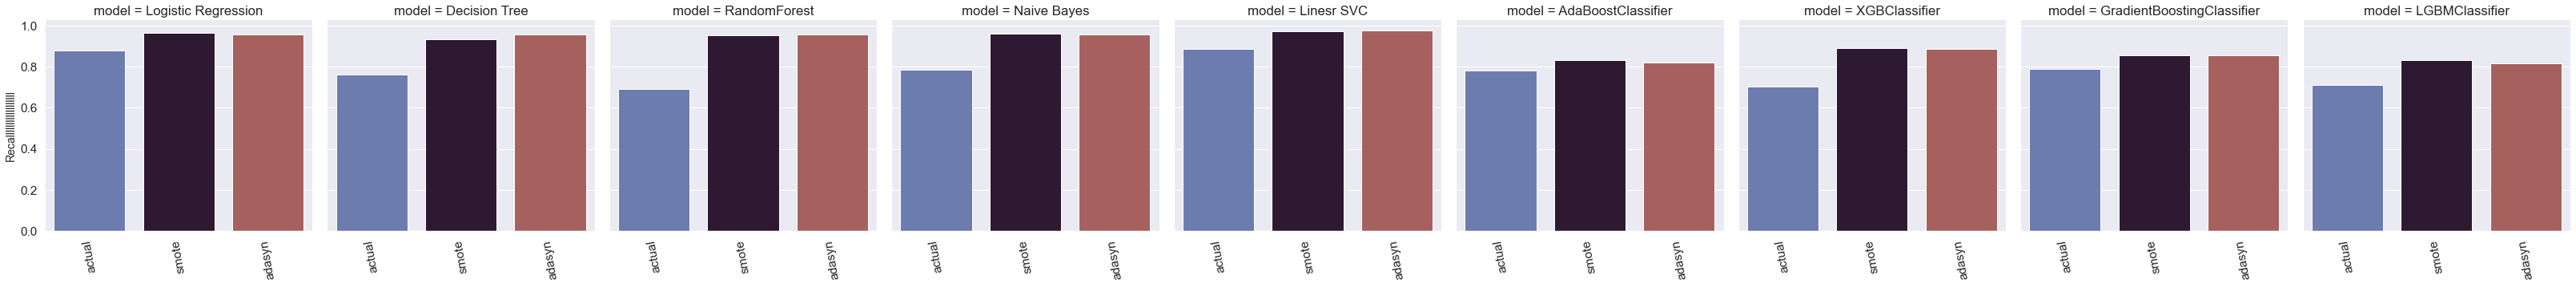

In [89]:
sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df, col="model", height=5)
g.map(sns.barplot, "resample", "Accuracy", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels(' ', fontsize=18)
g.set_ylabels('Recallllllllllllllllll', fontsize=14)

In [90]:
table = pd.pivot_table(data=df,index=['model','resample'])
table

Accuracy   F1score  precision    recall
model                      resample                                         
AdaBoostClassifier         actual    0.779736  0.820144   0.938272  0.728435
                           adasyn    0.821586  0.882779   0.806878  0.974441
                           smote     0.830396  0.888567   0.812169  0.980831
Decision Tree              actual    0.762115  0.850829   0.749392  0.984026
                           adasyn    0.958150  0.969404   0.977273  0.961661
                           smote     0.931718  0.950872   0.943396  0.958466
GradientBoostingClassifier actual    0.788546  0.863636   0.777494  0.971246
                           adasyn    0.854626  0.903509   0.832884  0.987220
                           smote     0.854626  0.904070   0.829333  0.993610
LGBMClassifier             actual    0.709251  0.821138   0.712941  0.968051
                           adasyn    0.817181  0.876304   0.821229  0.939297
                           smote     0.832599  0.884848   0.841499  0.932907
Linesr SVC                 actual    0.887665  0.921899   0.885294  0.961661
                           adasyn    0.977974  0.983923   0.990291  0.977636
                           smote     0.973568  0.980769   0.983923  0.977636
Logistic Regression        actual    0.878855  0.917293   0.866477  0.974441
                           adasyn    0.955947  0.967949   0.971061  0.964856
                           smote     0.964758  0.974441   0.974441  0.974441
Naive Bayes                actual    0.784141  0.863889   0.764128  0.993610
                           adasyn    0.958150  0.969305   0.980392  0.958466
                           smote     0.960352  0.971061   0.977346  0.964856
RandomForest               actual    0.689427  0.816167   0.689427  1.000000
                           adasyn    0.958150  0.970079   0.956522  0.984026
                           smote     0.951542  0.965732   0.942249  0.990415
XGBClassifier              actual    0.702643  0.822602   0.698661  1.000000
                           adasyn    0.887665  0.923077   0.874286  0.977636
                           smote     0.892070  0.925419   0.883721  0.971246

In [91]:
Dt_data=df.loc[df['model']=='Decision Tree']
Rt_data=df.loc[df['model']=='RandomForest']
Nb_data=df.loc[df['model']=='Naive Bayes']
Lr_data=df.loc[df['model']=='Logistic Regression']
Sv_data=df.loc[df['model']=='Linesr SVC']
Ad_data=df.loc[df['model']=='AdaBoostClassifier']
Xg_data=df.loc[df['model']=='XGBClassifier']
Gr_data=df.loc[df['model']=='GradientBoostingClassifier']
Lg_data=df.loc[df['model']=='LGBMClassifier']

In [92]:
Rt_data

,model,resample,precision,recall,F1score,Accuracy
6,RandomForest,actual,0.689427,1.000000,0.816167,0.689427
7,RandomForest,smote,0.942249,0.990415,0.965732,0.951542
8,RandomForest,adasyn,0.956522,0.984026,0.970079,0.958150


In [93]:
Dt_table=pd.pivot_table(data=Dt_data,index=['model','resample'])
Rt_table=pd.pivot_table(data=Rt_data,index=['model','resample'])
Nb_table=pd.pivot_table(data=Nb_data,index=['model','resample'])
Lr_table=pd.pivot_table(data=Lr_data,index=['model','resample'])
Sv_table=pd.pivot_table(data=Sv_data,index=['model','resample'])
Ad_table=pd.pivot_table(data=Ad_data,index=['model','resample'])
Xg_table=pd.pivot_table(data=Xg_data,index=['model','resample'])
Gr_table=pd.pivot_table(data=Gr_data,index=['model','resample'])
Lg_table=pd.pivot_table(data=Lg_data,index=['model','resample'])

In [94]:
Rt_table

Accuracy   F1score  precision    recall
model        resample                                         
RandomForest actual    0.689427  0.816167   0.689427  1.000000
             adasyn    0.958150  0.970079   0.956522  0.984026
             smote     0.951542  0.965732   0.942249  0.990415

In [95]:
Dt_table

Accuracy   F1score  precision    recall
model         resample                                         
Decision Tree actual    0.762115  0.850829   0.749392  0.984026
              adasyn    0.958150  0.969404   0.977273  0.961661
              smote     0.931718  0.950872   0.943396  0.958466

In [96]:
Nb_table

Accuracy   F1score  precision    recall
model       resample                                         
Naive Bayes actual    0.784141  0.863889   0.764128  0.993610
            adasyn    0.958150  0.969305   0.980392  0.958466
            smote     0.960352  0.971061   0.977346  0.964856

In [97]:
Lr_table

Accuracy   F1score  precision    recall
model               resample                                         
Logistic Regression actual    0.878855  0.917293   0.866477  0.974441
                    adasyn    0.955947  0.967949   0.971061  0.964856
                    smote     0.964758  0.974441   0.974441  0.974441

In [98]:
Sv_table

Accuracy   F1score  precision    recall
model      resample                                         
Linesr SVC actual    0.887665  0.921899   0.885294  0.961661
           adasyn    0.977974  0.983923   0.990291  0.977636
           smote     0.973568  0.980769   0.983923  0.977636

In [99]:
Ad_table

Accuracy   F1score  precision    recall
model              resample                                         
AdaBoostClassifier actual    0.779736  0.820144   0.938272  0.728435
                   adasyn    0.821586  0.882779   0.806878  0.974441
                   smote     0.830396  0.888567   0.812169  0.980831

In [100]:
Xg_table

Accuracy   F1score  precision    recall
model         resample                                         
XGBClassifier actual    0.702643  0.822602   0.698661  1.000000
              adasyn    0.887665  0.923077   0.874286  0.977636
              smote     0.892070  0.925419   0.883721  0.971246

In [101]:
Gr_table

Accuracy   F1score  precision    recall
model                      resample                                         
GradientBoostingClassifier actual    0.788546  0.863636   0.777494  0.971246
                           adasyn    0.854626  0.903509   0.832884  0.987220
                           smote     0.854626  0.904070   0.829333  0.993610

In [102]:
Lg_table

Accuracy   F1score  precision    recall
model          resample                                         
LGBMClassifier actual    0.709251  0.821138   0.712941  0.968051
               adasyn    0.817181  0.876304   0.821229  0.939297
               smote     0.832599  0.884848   0.841499  0.932907

<AxesSubplot:ylabel='model,resample'>

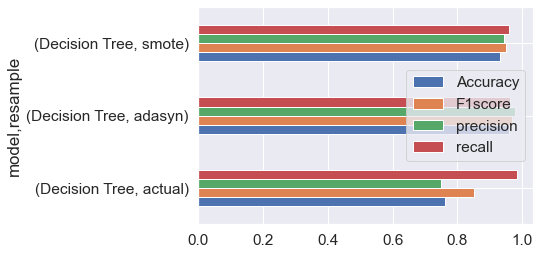

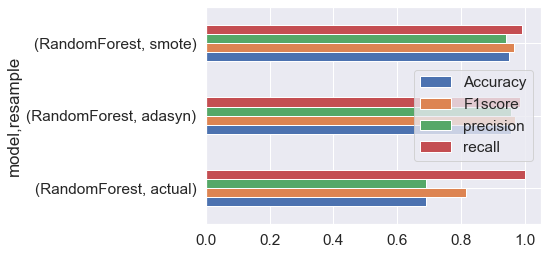

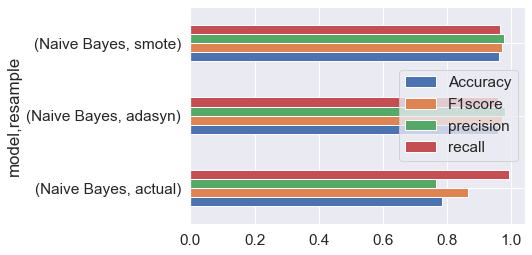

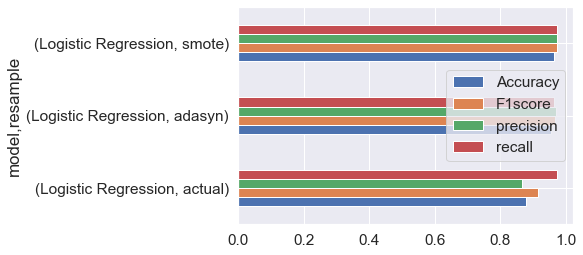

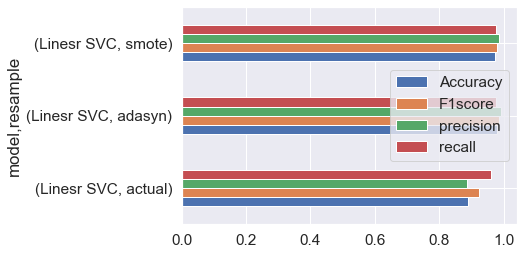

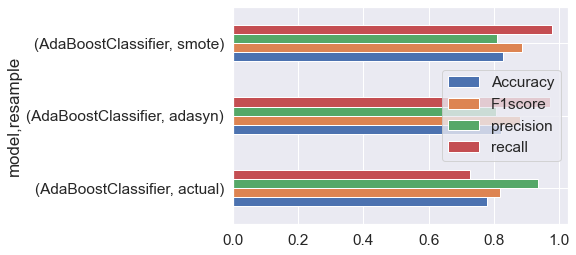

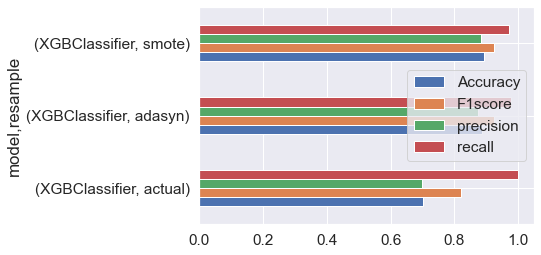

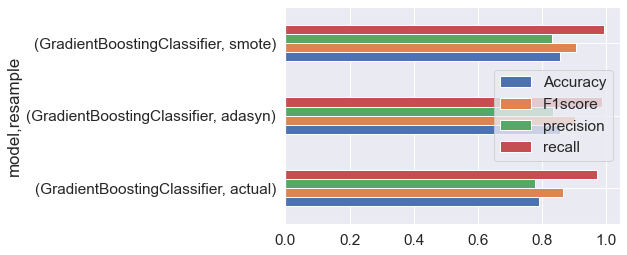

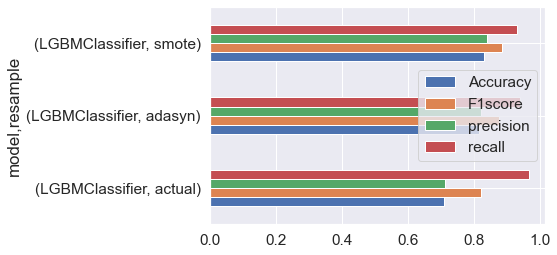

In [103]:
Dt_table.plot(kind='barh')
Rt_table.plot(kind='barh')
Nb_table.plot(kind='barh')
Lr_table.plot(kind='barh')
Sv_table.plot(kind='barh')
Ad_table.plot(kind='barh')
Xg_table.plot(kind='barh')
Gr_table.plot(kind='barh')
Lg_table.plot(kind='barh')

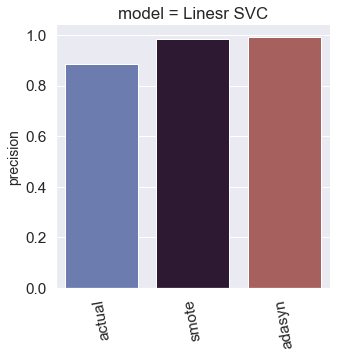

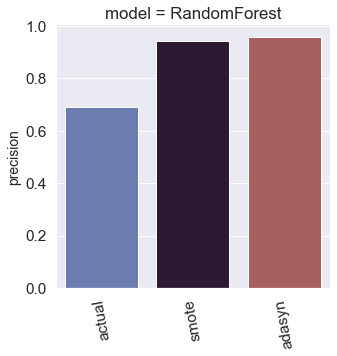

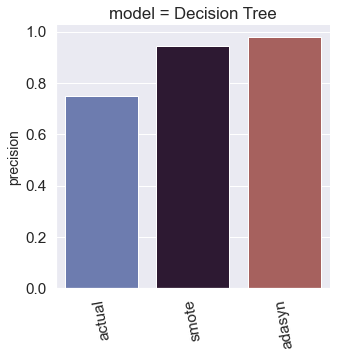

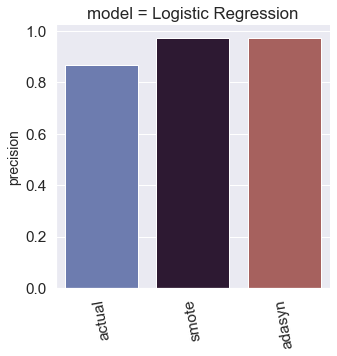

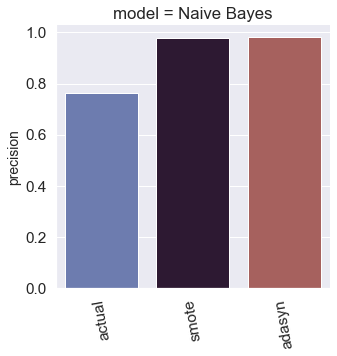

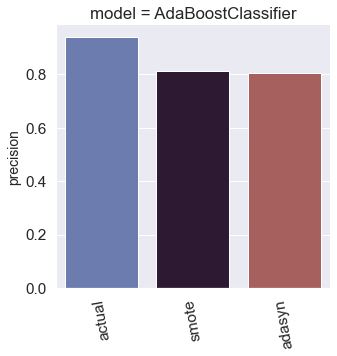

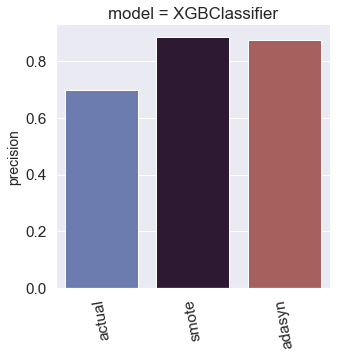

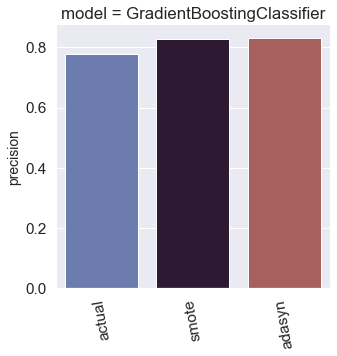

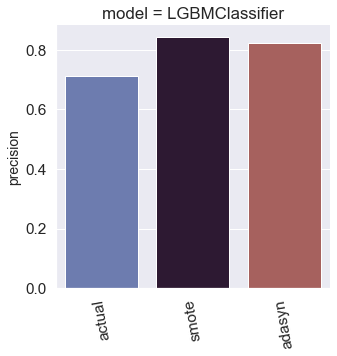

In [104]:
sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Linesr SVC'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='RandomForest'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Decision Tree'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Logistic Regression'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Naive Bayes'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='AdaBoostClassifier'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='XGBClassifier'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='GradientBoostingClassifier'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='LGBMClassifier'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

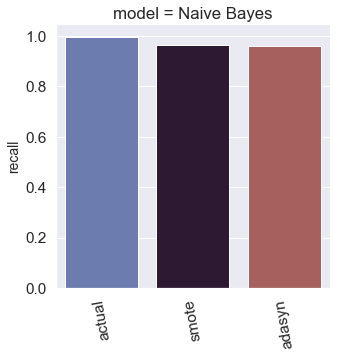

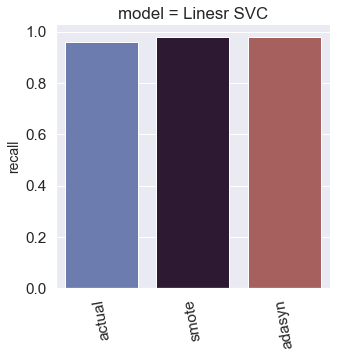

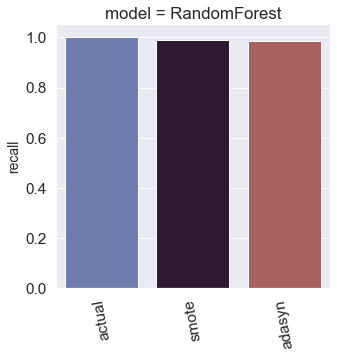

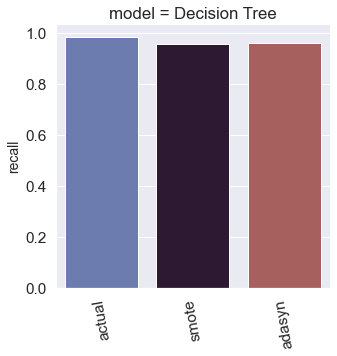

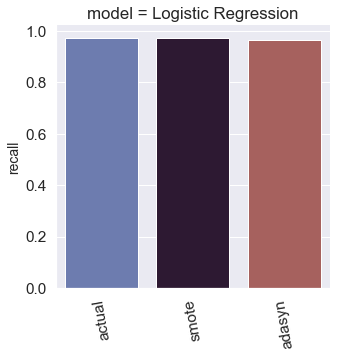

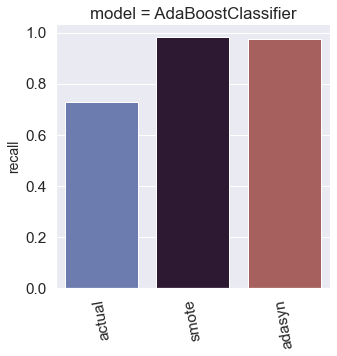

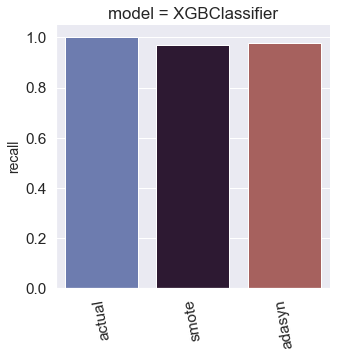

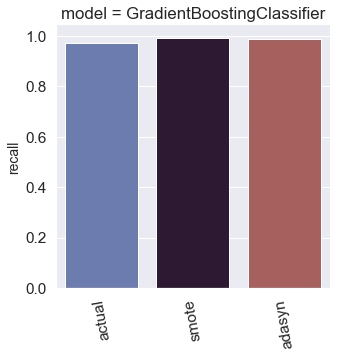

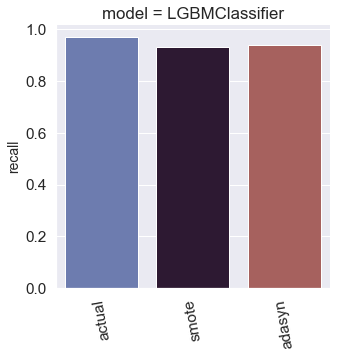

In [105]:
g = sns.FacetGrid(df.loc[df['model']=='Naive Bayes'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Linesr SVC'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='RandomForest'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Decision Tree'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Logistic Regression'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='AdaBoostClassifier'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='XGBClassifier'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='GradientBoostingClassifier'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='LGBMClassifier'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

# 4. Model Deployment

# From all the above models Linear SVC is the best model as it's best test accuracy

In [114]:
from pickle import dump

In [115]:
dump(svc_model,open('svc_model.pkl', 'wb'))

In [116]:
from pickle import load

In [117]:
svc_model_pickle = load(open('svc_model.pkl', 'rb'))

In [118]:
Pickle_pred = svc_model_pickle.predict(X_test)

# THE END